# Machine Vision for object tracking in video stream

## OpenCV

OpenCV is a the most popular library for computer vision and image processing. Originally written in C/C++, it now provides bindings for Python. To install it on your system, you can try the following command on your system prompt:

`pip install opencv-python`

If that doesn't work, follow the instructions at:
[https://pypi.org/project/opencv-python/](https://pypi.org/project/opencv-python/)

## Loading necessary libraries

We start by loading the necessary libraries (cv2 loads the openCV python wrapper)

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
#from IPython.html import widgets

%matplotlib inline

### Face recognition

Once we are able to detect objects in images, tracking and object in a video stream is trivial. You simply apply object detection to each frame in a video.

Real time object tracking using neural networks is computationally intensive and mostly requires a GPU. For this practical, we will use an old technique to track objects called Haar cascades.

You don't need to worry about the details of this technique, but in case you're interested: the OpenCV cascade breaks the problem of detecting faces into multiple stages. For each block, it does a very rough and quick test for the presence of a simple future on the image. If that passes, it does a slightly more detailed test, and so on. The algorithm may have 30-50 of these stages or cascades, and it will only detect a face if all stages pass. The advantage is that the majority of the pictures will return negative during the first few stages, which means the algorithm won’t waste time testing all 6,000 features on it. Instead of taking hours, face detection can now be done in real time.

Though the theory may sound complicated, in practice it is quite easy. The cascades themselves are just a bunch of XML files that contain OpenCV data used to detect objects. You initialize your code with the cascade you want, and then OpenCV does the work for you.

OpenCV comes with a trainer as well as detector. If you want to train your own classifier for any object like car, planes, dogs etc, you can use OpenCV to create one **Haar cascade** specific for that object. Its full details are given here: [Cascade Classifier Training](http://docs.opencv.org/3.1.0/dc/d88/tutorial_traincascade.html).

There are also [repositories](http://alereimondo.no-ip.org/OpenCV/34/) of already created Haar cascades. Let's create a face  tracking  application using OpenCV and a haar cascade (encoded as an XML file) for detecting faces in an image.

Study the comments in the following code snippet to understand how the code is trying to detect faces in the following image:

![](./images/abba.png)

Found 4 faces!


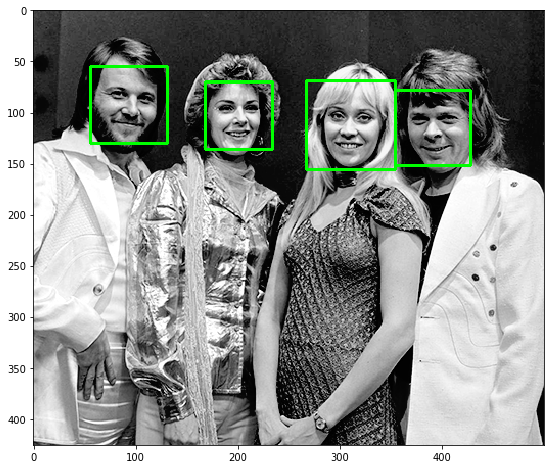

In [5]:
import cv2
import sys

#image you want to analyze
imagePath = './images/abba.png'
#imagePath = './images/beachboys.jpg' #A harder example

#default cascade for detecting faces provided by OpenCV.
cascPath = './haarcascade_frontalface_default.xml'

# Create the haar cascade. This loads the face cascade into memory so it’s ready for use. Remember, the cascade is 
#just an XML file that contains the data to detect faces.
faceCascade = cv2.CascadeClassifier(cascPath)

# Here we read the image and convert it to grayscale. Many operations in OpenCv are done in grayscale.
image = cv2.imread(imagePath)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = faceCascade.detectMultiScale( #The detectMultiScale function is a general function that detects objects. Since we are calling it on the face cascade, that’s what it detects. 
    gray, #The first option is the grayscale image.
    scaleFactor=1.1, #Since some faces may be closer to the camera, they would appear bigger than those faces in the back. The scale factor compensates for this.
    minNeighbors=5, #The detection algorithm uses a moving window to detect objects. minNeighbors defines how many objects are detected near the current one before it declares the face found.
    minSize=(30, 30), #gives the size of each window.
)

#The function returns a list of rectangles where it believes it found a face. 
print ("Found {0} faces!".format(len(faces)))

# we will loop over where it thinks it found a face. Each face object returns 4 values: the x and y location of the rectangle, and the rectangle’s width and height (w , h).
for (x, y, w, h) in faces:
    # Draw a rectangle around the faces
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2) 


plt.figure(figsize=(16,8))
plt.imshow(image)
plt.show()

#Alternative Using External window
# cv2.imshow("Faces found", image)
# cv2.waitKey(0)    

## Face tracking on a video stream from your web camera

Once we can find faces in the static images, the logical next step is doing it on a videostream. Let's do it in real time on the video signal coming from your computer webcam.

In [6]:
import sys

#This should be familiar to you. We are creating a face cascade, as we did in the image example.
cascPath = './haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(cascPath)

## This line sets the video source to the default webcam, which OpenCV can easily capture
cap = cv2.VideoCapture(0) #cap is your camera object
#NOTE: You can also provide a filename here, and Python will read in the video file. However, you need to have ffmpeg installed for that since OpenCV itself cannot decode compressed video.

while(True):
    """
    The read() function reads one frame from the video source, which in this example is the webcam. This returns:
    The actual video frame read (one frame on each loop) A return code. The return code tells us if we have run out of frames, which will happen if we are 
    reading from a file. This doesn’t matter when reading from the webcam, since we can record forever, so we will ignore it.
    """
    ret, frame = cap.read() #Capture frame-by-frame. 
    if not ret : continue   #needed to avoid empty buffer errors
        
    # Our operations on each frame of the video come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    #searching for the face in our captured frame.
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
        
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)   
        
    # Display the resulting frame
    cv2.imshow('frame',frame)
    
    #We wait for the ‘q’ key to be pressed. If it is, we exit the script.
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()